In [2]:
import numpy as np 
import pandas as pd
import os
from sklearn.manifold import TSNE
!pip3 install spacy

import spacy 
import nltk
from nltk.stem import WordNetLemmatizer
from gensim.models.ldamodel import LdaModel
from gensim import corpora, models
from nltk.corpus import stopwords

     --------------------------------------- 11.9/11.9 MB 18.7 MB/s eta 0:00:00
     ------------------------------------- 481.4/481.4 kB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB ? eta 0:00:00
     ---------------------------------------- 181.6/181.6 kB ? eta 0:00:00
     ---------------------------------------- 42.8/42.8 kB ? eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 26.8 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 19.3 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 25.0 MB/s eta 0:00:00


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette("ch:s=.45,rot=-.15")
from PIL import Image


In [8]:
from wordcloud import WordCloud, ImageColorGenerator


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords
# from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [7]:
videos_df = pd.read_csv("videos-stats.csv")
comments_df = pd.read_csv("comments.csv")

In [8]:
videos_df.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [9]:
comments_df.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [10]:
videos_df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
videos_df.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [12]:
comments_df.drop(columns=['Unnamed: 0'],inplace=True)
comments_df.head()

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


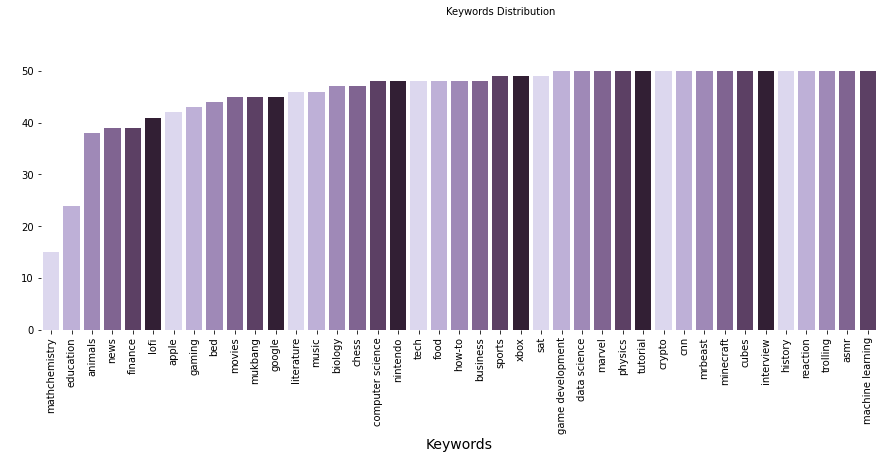

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(data = videos_df, x = 'Keyword',ax=ax, order = videos_df['Keyword'].value_counts(ascending=True).index,palette=palette)
ax.set_xlabel(xlabel='Keywords', size=14)
ax.set_ylabel(ylabel=" ")
sns.despine(bottom=True, left=True)
plt.xticks(rotation=90)
fig.text(0.5, 1,"Keywords Distribution")
plt.show()

In [16]:
text = " ".join(i for i in videos_df.Title)


C:\Users\kxs6146\Anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


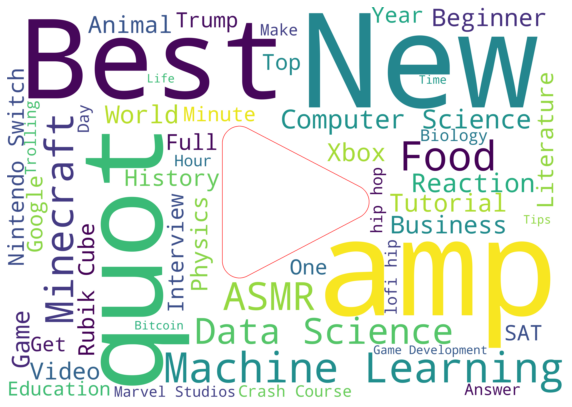

In [17]:
yTitle = np.array(Image.open("youtube.png").convert('L'))
yTitle.shape

wordcloud = WordCloud(mask=yTitle, max_words = 50, stopwords=stopwords, background_color="white",regexp='[A-Za-z]{3,}',min_word_length=3,contour_width=3, contour_color='red')
                        # contour_width=3, contour_color='red'



wordcloud.generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [18]:
nlp = spacy.load("en_core_web_sm")

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma.isalpha() or lemma.isnumeric():
            if not remove_stopwords or (remove_stopwords and lemma not in stopwords):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


videos_df['Clean_Titles'] = videos_df['Title'].apply(normalize, lowercase=True, remove_stopwords=True)

In [20]:
videos_df.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views,Clean_Titles
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,apple pay kill physical wallet eight year tech...
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0,expensive thing I
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0,new house gaming setup sick
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0,petrol vs liquid nitrogen freeze experiment tech
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0,well back school tech 2022


In [21]:
merged_df = videos_df.merge(comments_df, on = 'Video ID')
merged_df.head()

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Clean_Titles,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,apple pay kill physical wallet eight year tech...,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,apple pay kill physical wallet eight year tech...,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,apple pay kill physical wallet eight year tech...,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,apple pay kill physical wallet eight year tech...,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,apple pay kill physical wallet eight year tech...,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [22]:
merged_df.Sentiment = merged_df.Sentiment.astype(int)
merged_df.head()

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Clean_Titles,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,apple pay kill physical wallet eight year tech...,Let's not forget that Apple Pay in 2014 requir...,95.0,1
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,apple pay kill physical wallet eight year tech...,Here in NZ 50% of retailers don’t even have co...,19.0,0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,apple pay kill physical wallet eight year tech...,I will forever acknowledge this channel with t...,161.0,2
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,apple pay kill physical wallet eight year tech...,Whenever I go to a place that doesn’t take App...,8.0,0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,apple pay kill physical wallet eight year tech...,"Apple Pay is so convenient, secure, and easy t...",34.0,2


In [24]:
sentiment_df = merged_df.groupby(['Keyword','Sentiment']).count()
sentiment_df = sentiment_df.stack().to_frame().reset_index()

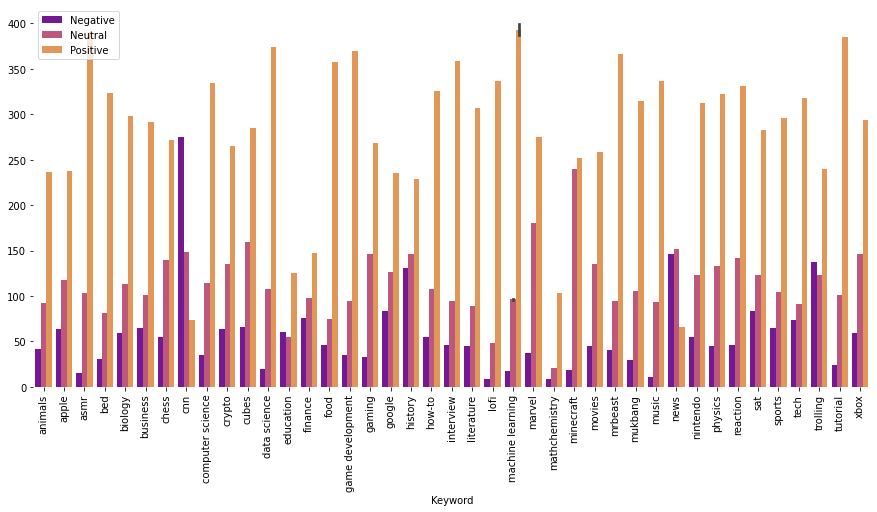

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.barplot(x="Keyword", y=0, hue="Sentiment", data=sentiment_df,palette='plasma')
plt.xticks(rotation=90)
plt.ylabel(ylabel="")
sns.despine(bottom=True, left=True)
L=plt.legend(loc='upper left')
L.get_texts()[0].set_text('Negative')
L.get_texts()[1].set_text('Neutral')
L.get_texts()[2].set_text('Positive')
plt.show()

In [ ]:
!pip3 install spacy
nltk.download('omw-1.4')
!python -m spacy download en_core_web_sm